In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
RC = 0.01

In [3]:
def dV(V_o,t):
    if (np.floor(2*t) % 2)==0:
        V_i = 1
    else:
        V_i = -1
    return((V_i-V_o)/RC)

In [4]:
def RK4(dx,x_i,t0,tfin,h):
    N = int((tfin-t0)/h)
    t_values = np.linspace(t0,tfin,N+1)
    x_values = np.zeros(len(t_values))
    x_values[0] = x_i
    
    for i in range(0,N):
        t = t_values[i]
        x = x_values[i]
        
        k1 = h/2 * dx(x,t)
        k2 = h/2 * dx(x+k1,t+h/2)
        k3 = h * dx(x+k2,t+h/2)
        k4 = h * dx(x+k3,t+h)
        
        x_values[i+1] = x + 1/6*(2*k1+4*k2+2*k3+k4)
    return(t_values,x_values)

In [5]:
t,V = RK4(dV,0,0,10,0.01)

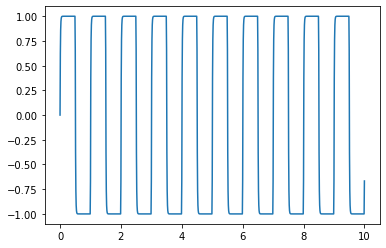

In [6]:
plt.plot(t,V)

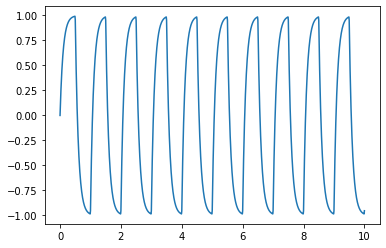

In [7]:
RC = 0.1
t,V = RK4(dV,0,0,10,0.01)
plt.plot(t,V)

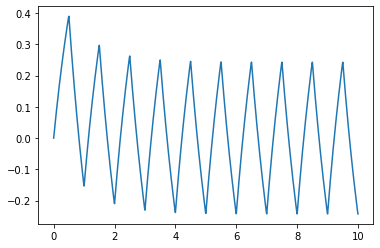

In [8]:
RC = 1
t,V = RK4(dV,0,0,10,0.01)
plt.plot(t,V)

In [9]:
# Q5

In [10]:
C = 2
Om = 5
g = 9.81
l = 0.1

In [11]:
def RK4_2(dx,x_i,dy,y_i,t0,tfin,h):
    
    N = int((tfin-t0)/h)
    
    t_values = np.linspace(t0,tfin,N+1)
    x_values = np.zeros(len(t_values))
    x_values[0] = x_i
    y_values = np.zeros(len(t_values))
    y_values[0] = y_i
    
    for i in range(0,N):
        t = t_values[i]
        x = x_values[i]
        y = y_values[i]
        
        k1_x = h/2 * dx(x,y,t)
        k1_y = h/2 * dy(x,y,t)
        
        k2_x = h/2*dx(x+k1_x,y+k1_y,t+h/2)
        k2_y = h/2*dy(x+k1_x,y+k1_y,t+h/2)
        
        k3_x = h*dx(x+k2_x,y+k2_y,t+h/2)
        k3_y = h*dy(x+k2_x,y+k2_y,t+h/2)
        
        k4_x = h*dx(x+k3_x,y+k3_y,t+h)
        k4_y = h*dy(x+k3_x,y+k3_y,t+h)
        
        x_values[i+1] = x + 1/6*(2*k1_x+4*k2_x+2*k3_x+k4_x)
        y_values[i+1] = y + 1/6*(2*k1_y+4*k2_y+2*k3_y+k4_y)
    return(t_values,x_values,y_values)

In [12]:
def dy(x,y,t):
    return((C*np.cos(x)*np.sin(Om*t))-(g*np.sin(x)/l))

In [13]:
def dx(x,y,t):
    return(y)

In [14]:
t,theta,y = RK4_2(dx,0,dy,0,0,100,0.001)

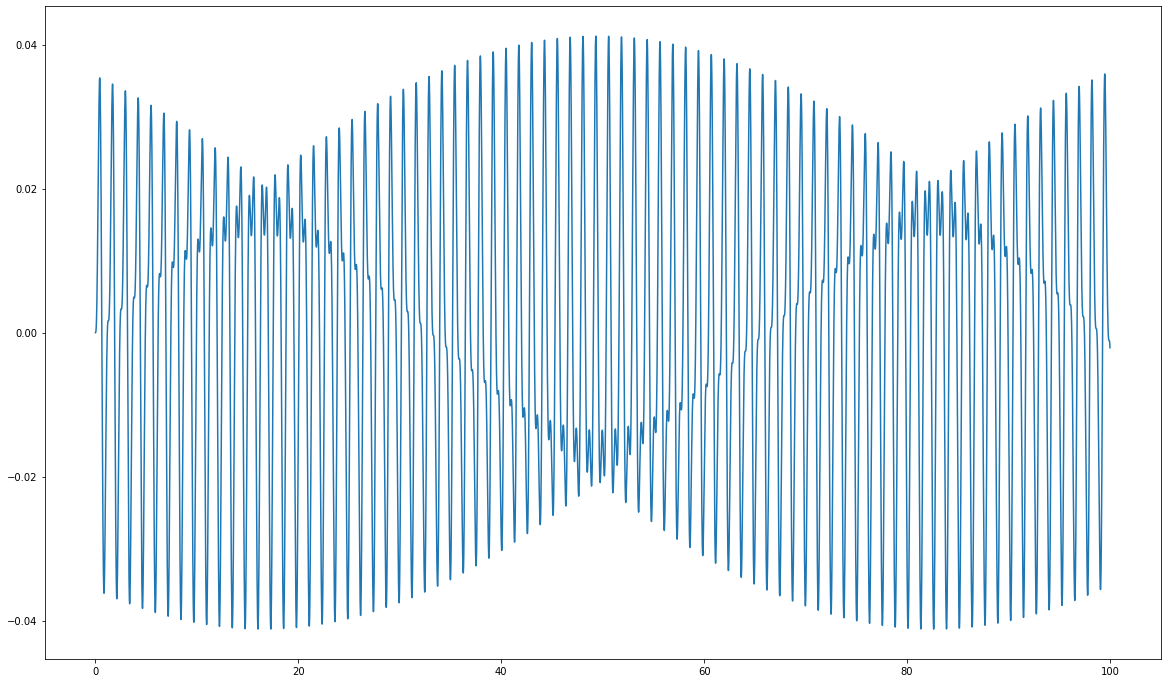

In [15]:
plt.figure(figsize=(20, 12))
plt.plot(t,theta)

5
5.01
5.02
5.029999999999999
5.039999999999999
5.049999999999999
5.059999999999999
5.0699999999999985
5.079999999999998
5.089999999999998
5.099999999999998
5.109999999999998
5.119999999999997
5.129999999999997
5.139999999999997


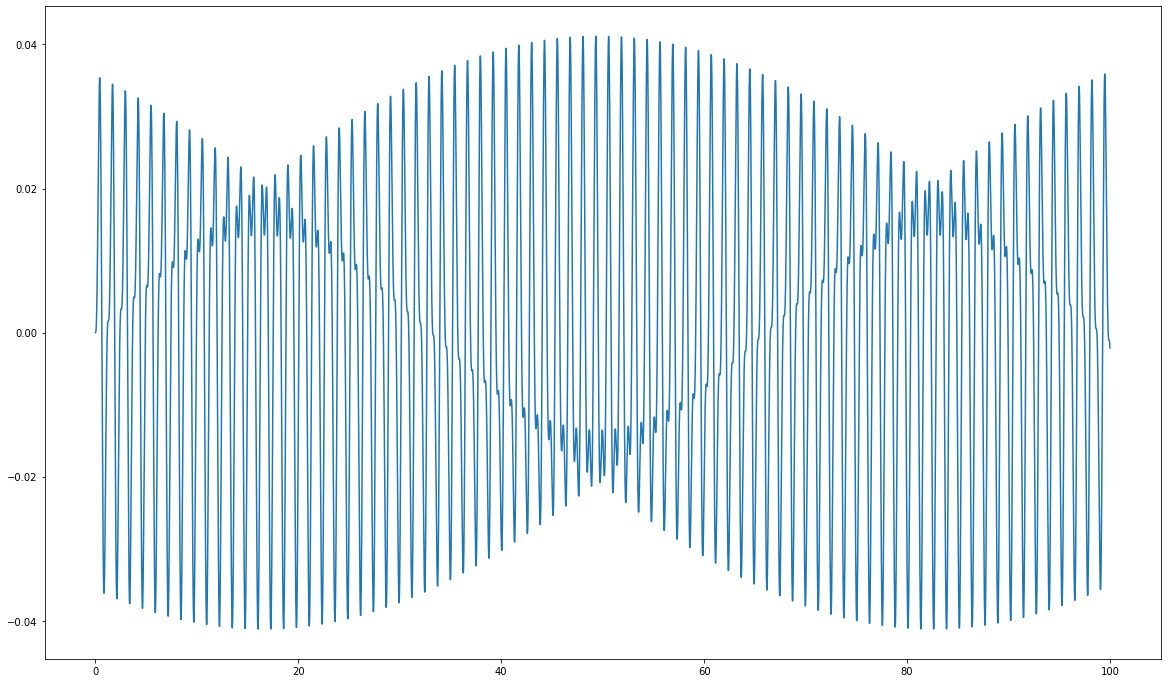

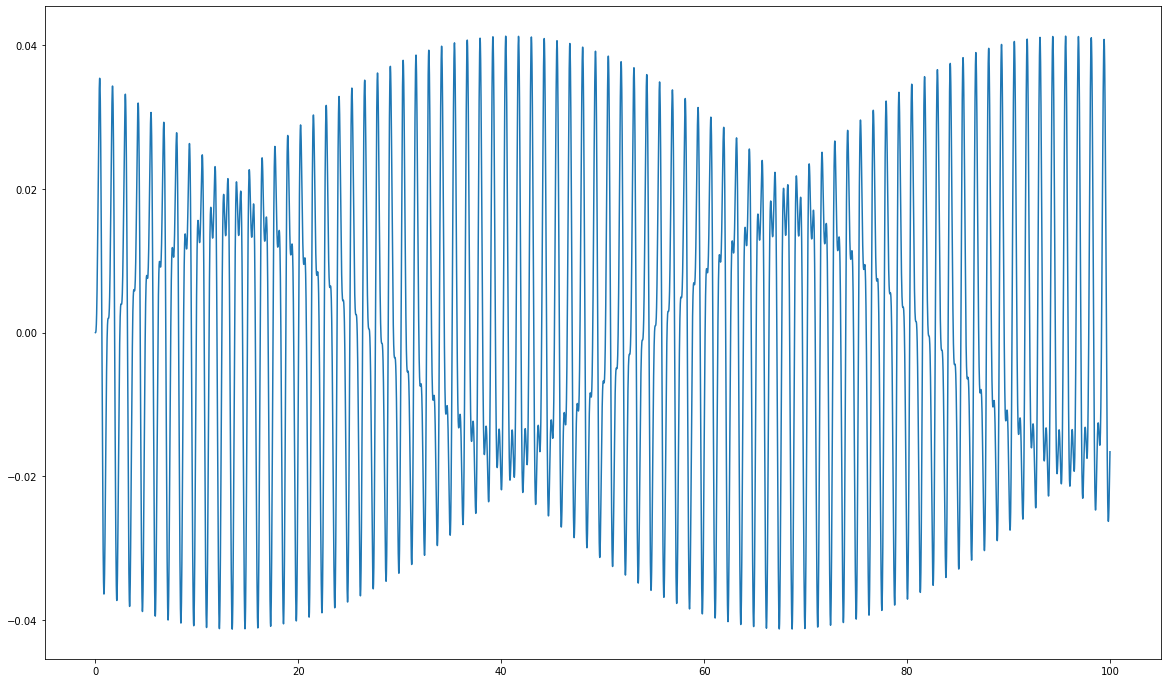

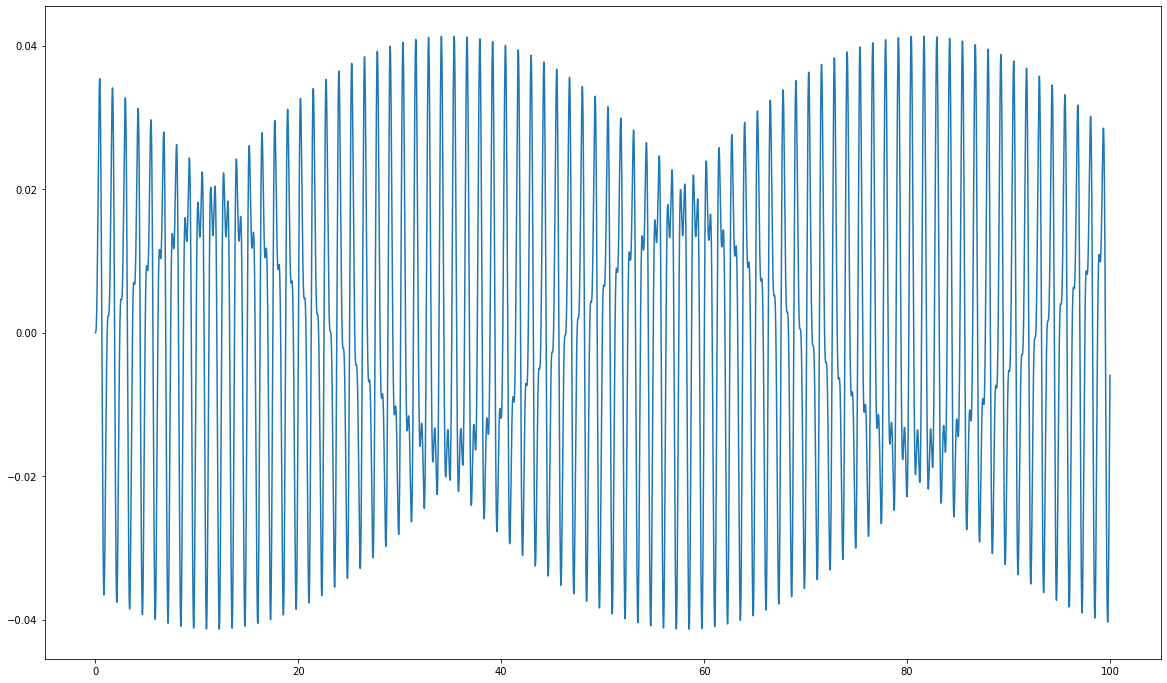

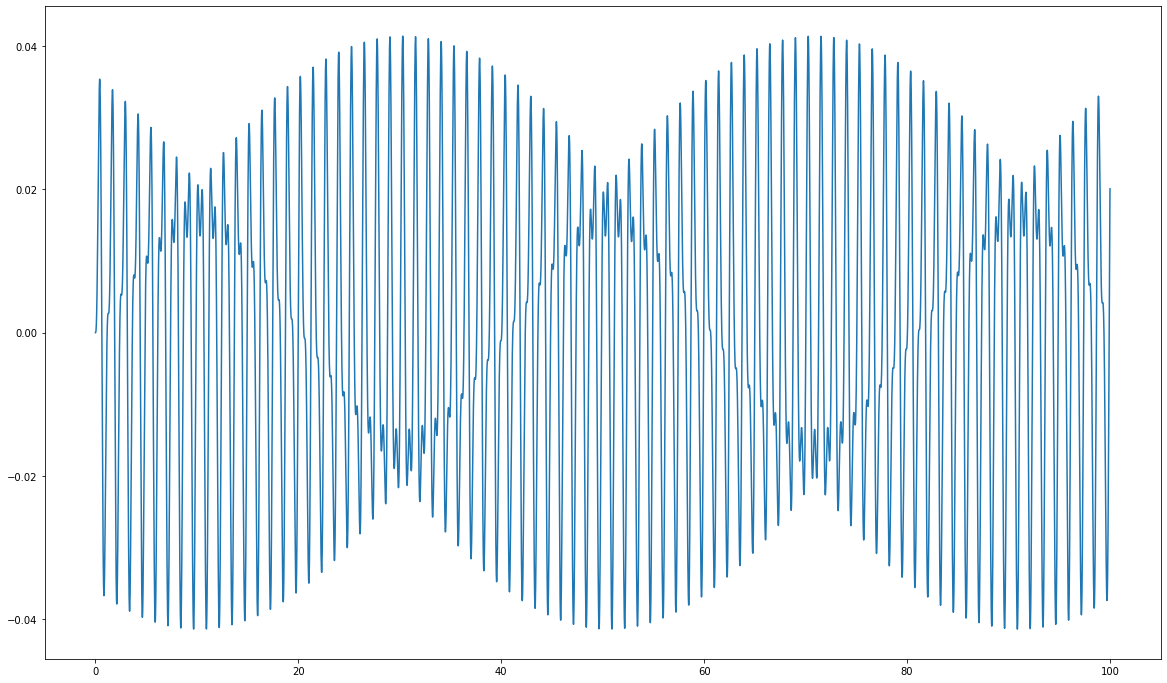

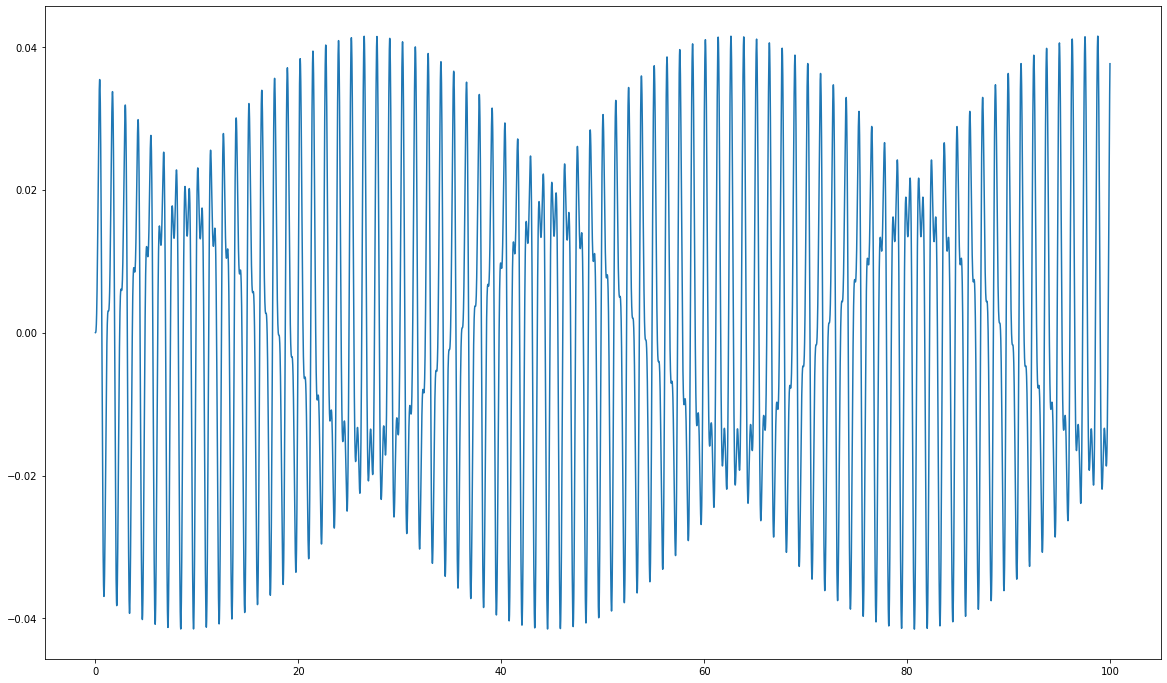

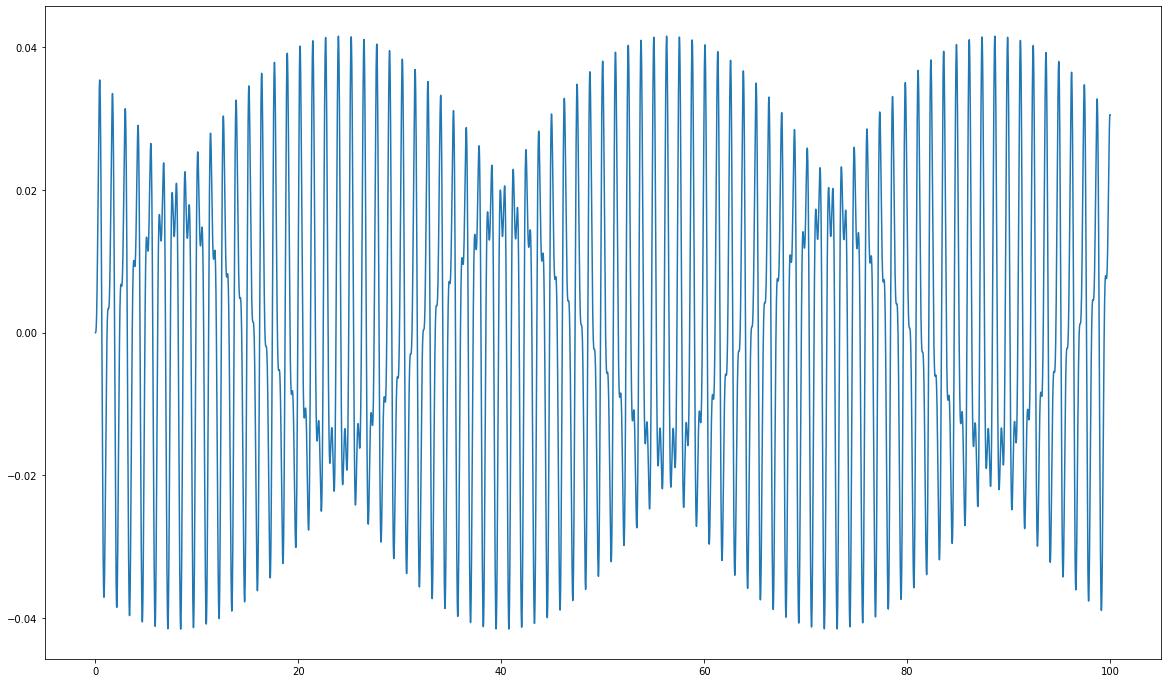

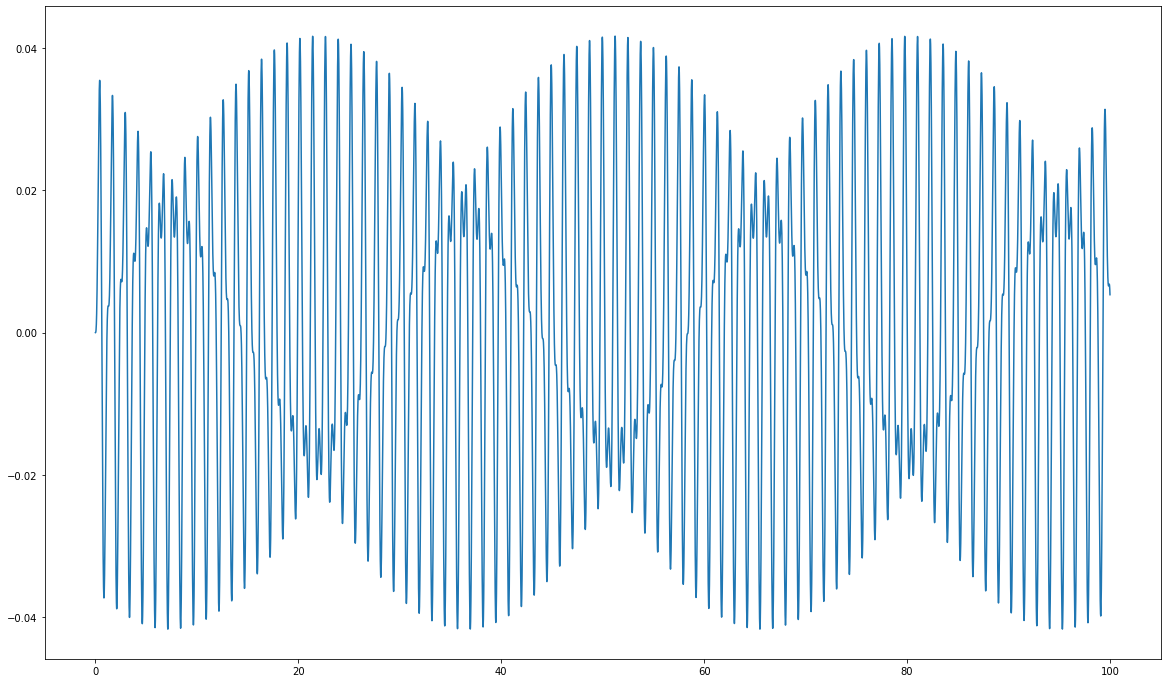

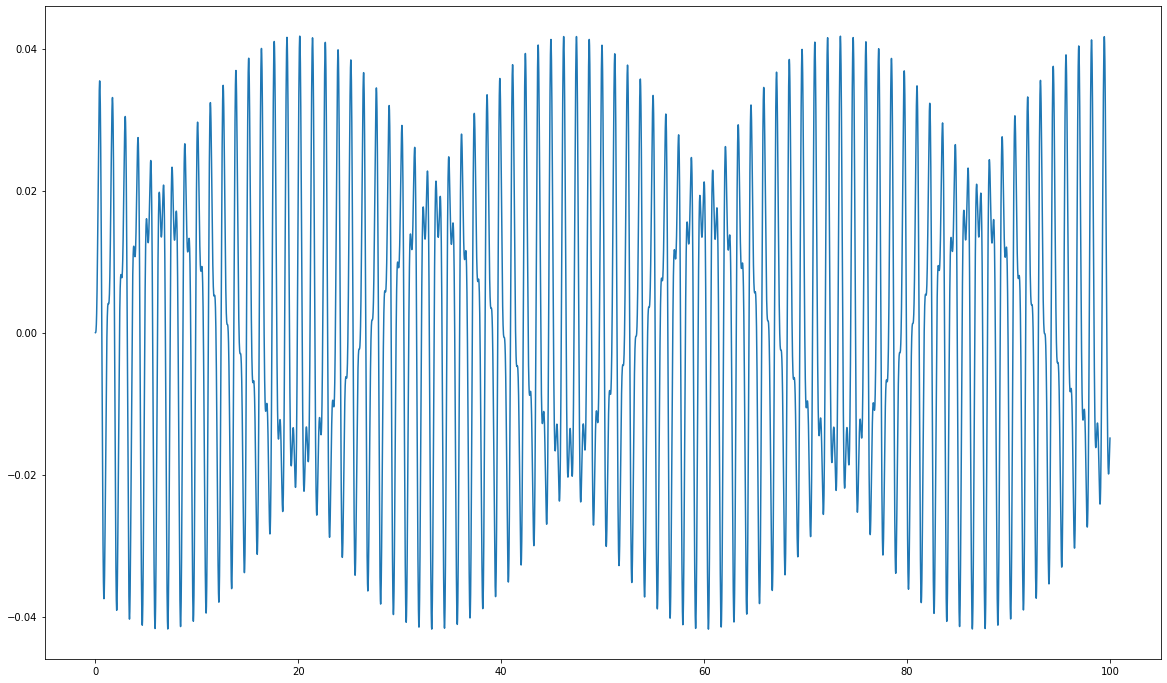

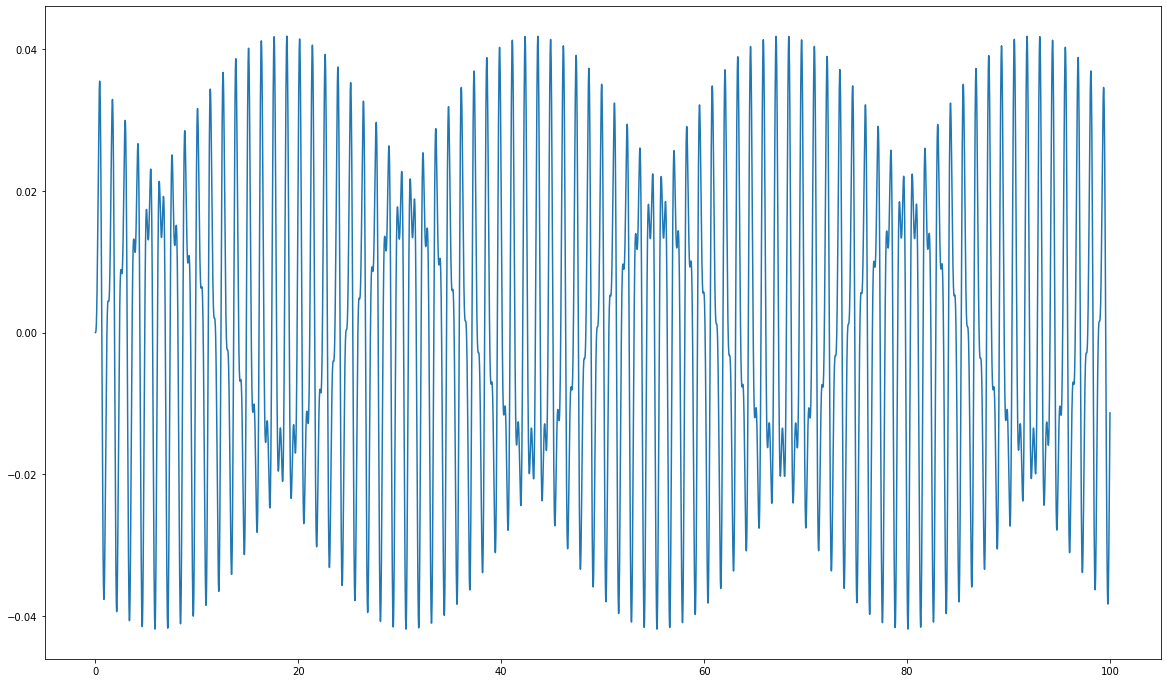

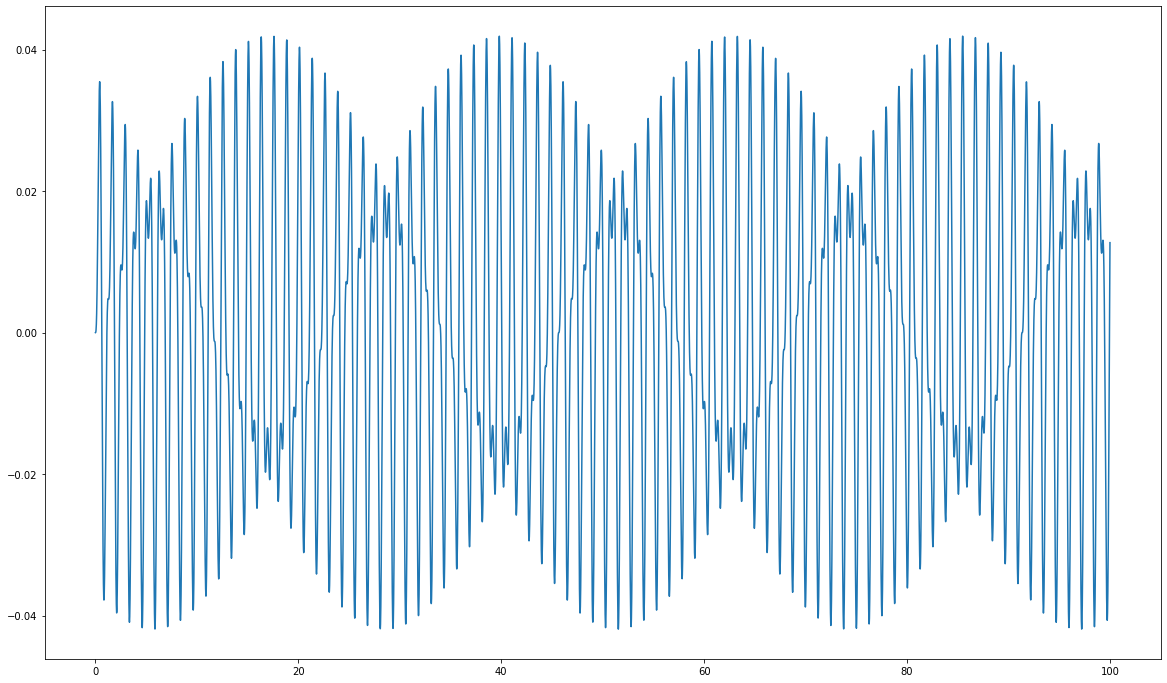

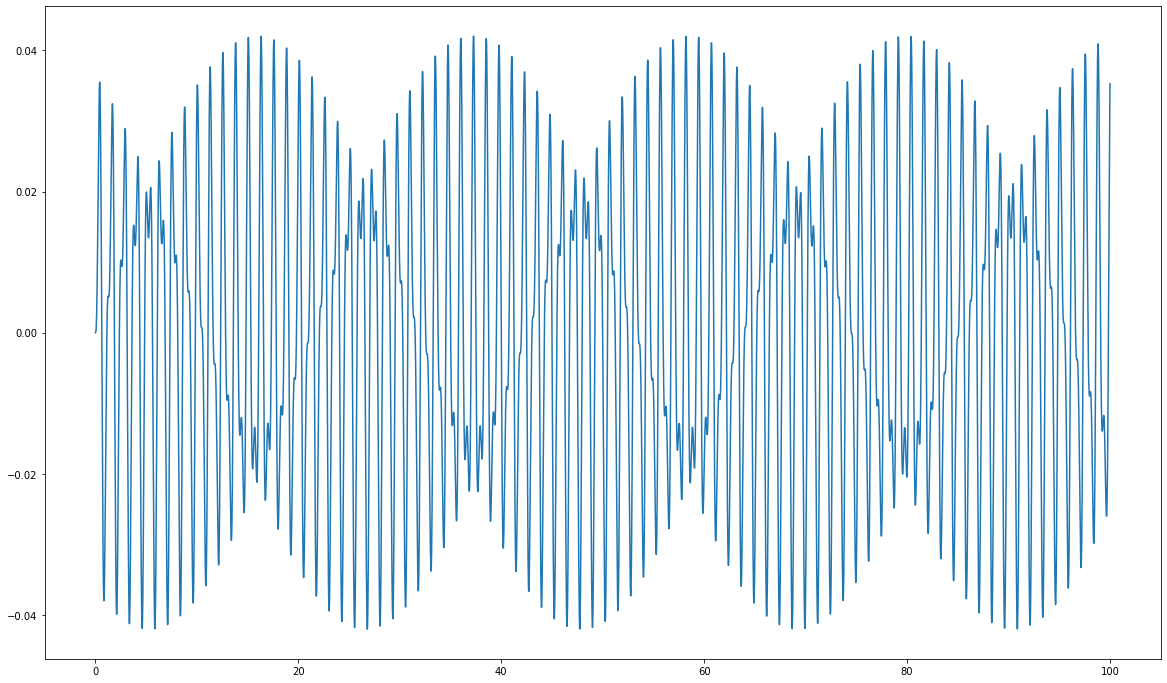

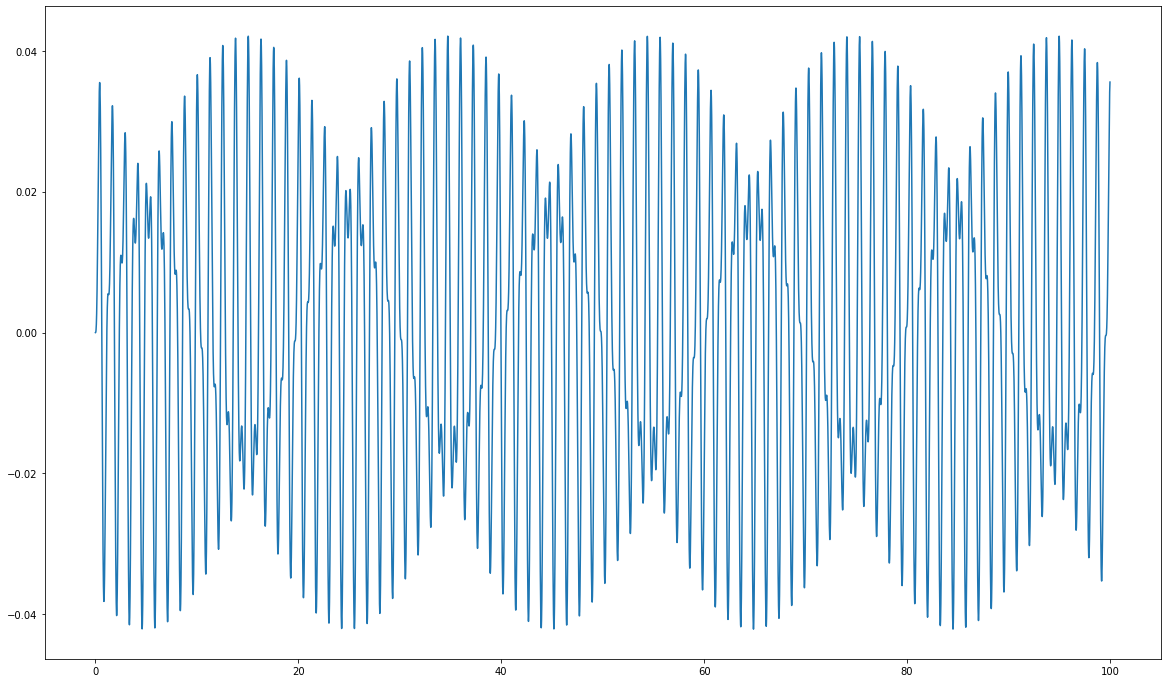

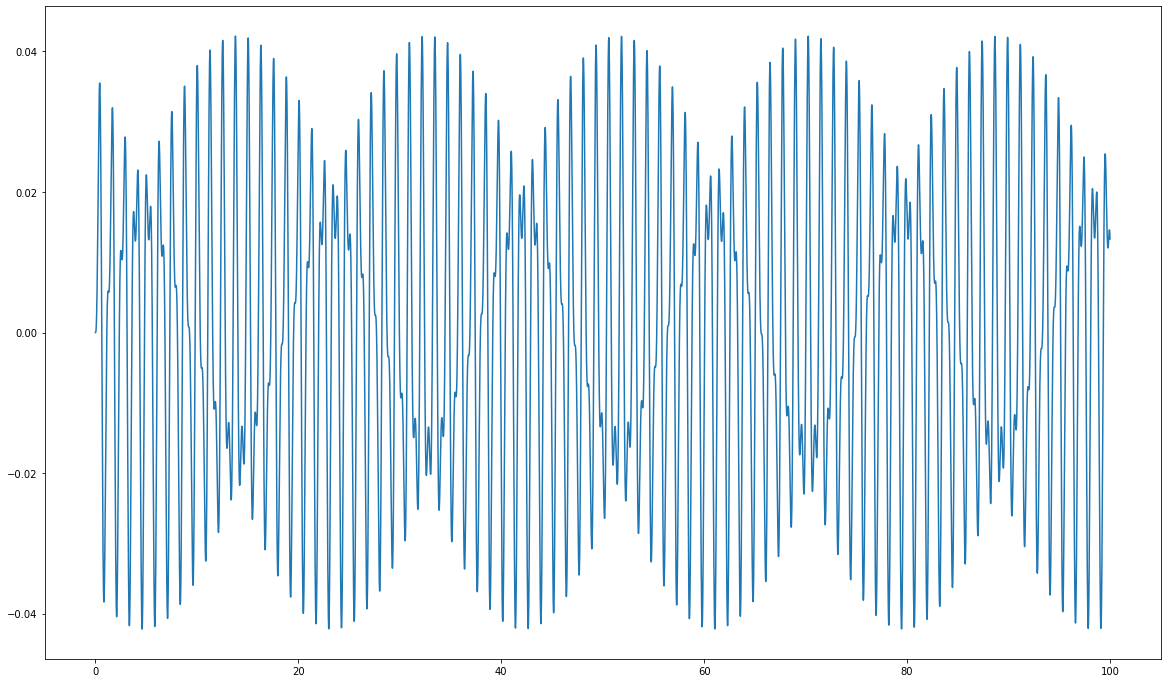

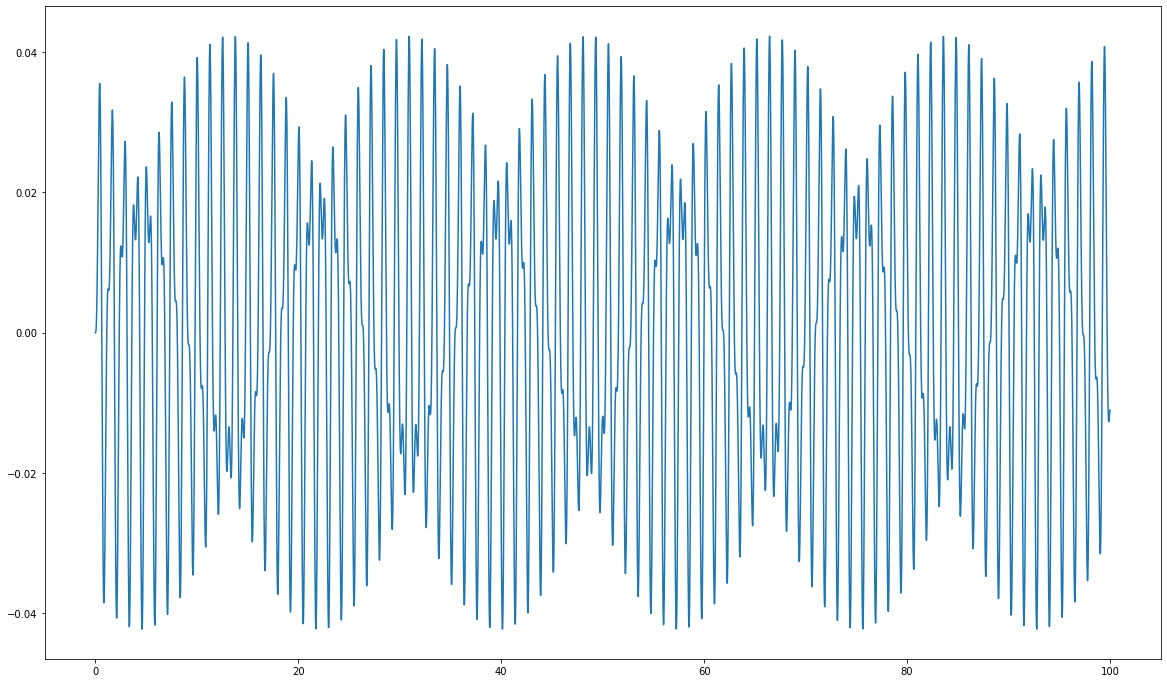

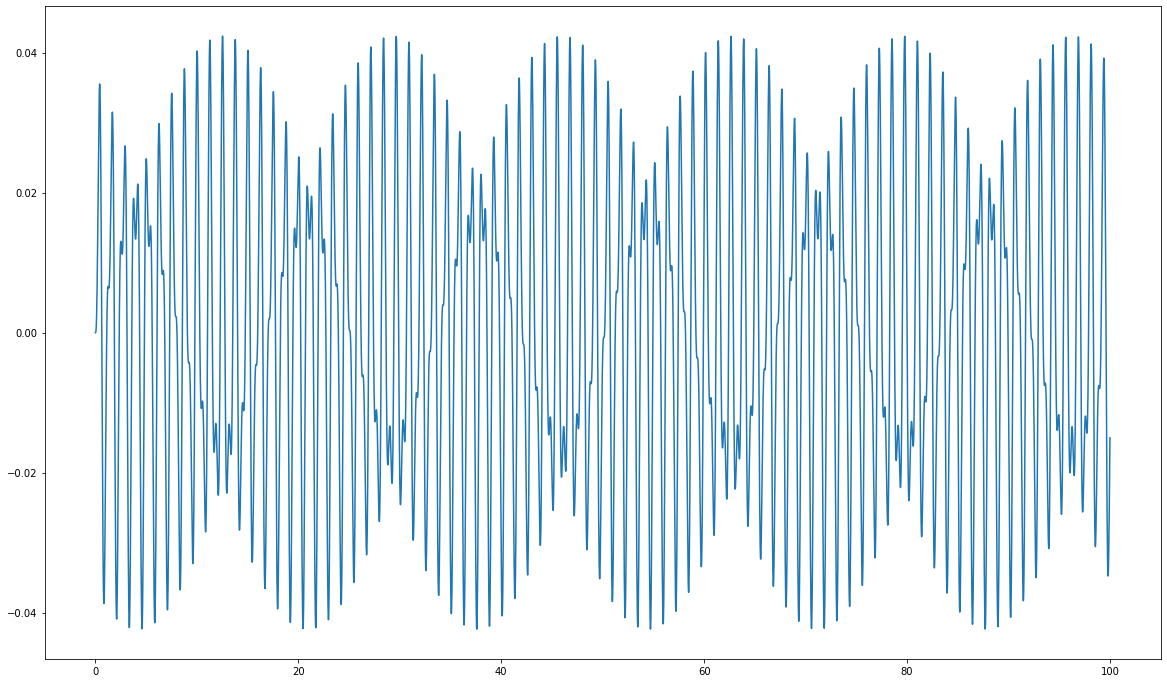

In [16]:
Om = 5

for i in range(15):
    t,theta,y = RK4_2(dx,0,dy,0,0,100,0.01)
    plt.figure(figsize=(20, 12))
    plt.plot(t,theta)
    print(Om)
    Om += 0.01

In [17]:
def L_k(x,k,xp):
    result = 1
    for i in range(len(xp)):
        if i != k:
            result *= (x-xp[i])/(xp[k]-xp[i])
    return(result)

In [18]:
def p_L(x,xp,yp):
    result = 0.0
    for i in range(len(xp)):
        result += yp[i] * L_k(x,i,xp)
    return(result)

In [19]:
xp = np.linspace(0,np.pi,5)
yp = np.sin(xp)

In [20]:
def test_p_L(xp,yp):
    errors = []
    for x, y in zip(xp,yp):
        interpolated_value = p_L(x,xp,yp)
        error = abs(interpolated_value - y)
        errors.append((x,error))
    print(errors)

In [21]:
test_p_L(xp,yp)

[(0.0, 0.0), (0.7853981633974483, 0.0), (1.5707963267948966, 0.0), (2.356194490192345, 0.0), (3.141592653589793, 0.0)]


In [22]:
def graph(f,n,xmin,xmax,resolution=1001):
    xp = np.linspace(xmin,xmax,n)
    yp = f(xp)
    
    x_plot = np.linspace(xmin,xmax,resolution)
    y_plot = [p_L(x,xp,yp) for x in x_plot]
    
    plt.plot(x_plot,f(x_plot),linestyle='dashed')
    plt.plot(x_plot,y_plot)
    plt.scatter(xp,yp)
    plt.show()

In [23]:
f = lambda x: (np.sin(x) * np.cos(x)) + (2*np.sin(x)) + np.cos(2*x)

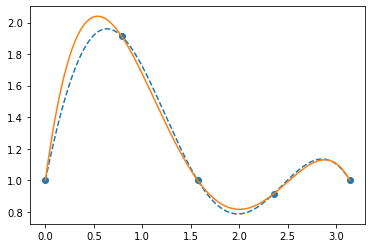

In [24]:
graph(f,5,0,np.pi)

In [25]:
Y = lambda y : y**4 - 7*y**3 + 2*y**2

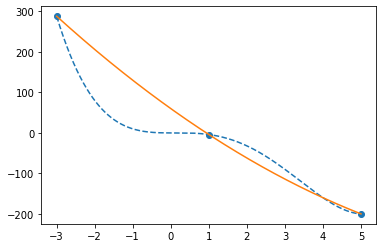

In [26]:
graph(Y,3,-3,5)

In [27]:
# Ex 2

In [28]:
g = -9.807
r = 0.06
m = 0.25
p = 1.275e3
C_d = 1.387e-2

In [29]:
N = 100
v_0_mean = 5
v_0_std = 0.2
theta_mean = np.radians(45)
theta_std = np.radians(1)

v_0 = np.random.normal(v_0_mean,v_0_std,N)
theta = np.random.normal(theta_mean,theta_std,N)



In [30]:
def RK4_2(dx,x_i,dy,y_i,t0,tfin,h):
    
    N = int((tfin-t0)/h)
    
    t_values = np.linspace(t0,tfin,N+1)
    x_values = np.zeros(len(t_values))
    x_values[0] = x_i
    y_values = np.zeros(len(t_values))
    y_values[0] = y_i
    
    for i in range(0,N):
        t = t_values[i]
        x = x_values[i]
        y = y_values[i]
        
        k1_x = h/2 * dx(x,y,t)
        k1_y = h/2 * dy(x,y,t)
        
        k2_x = h/2*dx(x+k1_x,y+k1_y,t+h/2)
        k2_y = h/2*dy(x+k1_x,y+k1_y,t+h/2)
        
        k3_x = h*dx(x+k2_x,y+k2_y,t+h/2)
        k3_y = h*dy(x+k2_x,y+k2_y,t+h/2)
        
        k4_x = h*dx(x+k3_x,y+k3_y,t+h)
        k4_y = h*dy(x+k3_x,y+k3_y,t+h)
        
        x_values[i+1] = x + 1/6*(2*k1_x+4*k2_x+2*k3_x+k4_x)
        y_values[i+1] = y + 1/6*(2*k1_y+4*k2_y+2*k3_y+k4_y)
    return(t_values,x_values,y_values)

In [31]:
F = lambda v: -0.25 * np.pi * r**2 * p * C_d * v**2
az = lambda vz: g + F(vz)/m
ax = lambda vx: F(vx)/m
d = lambda x: x

In [32]:
# Rabbits and Foxes

In [33]:
a = 1
b = 0.5
g = 0.5
d = 2

In [34]:
def dx(x,y,t):
    return(a*x-b*x*y)
def dy(x,y,t):
    return(g*x*y-d*y)

In [35]:
t,x,y = RK4_2(dx,2,dy,2,0,30,0.01)

<function matplotlib.pyplot.show(close=None, block=None)>

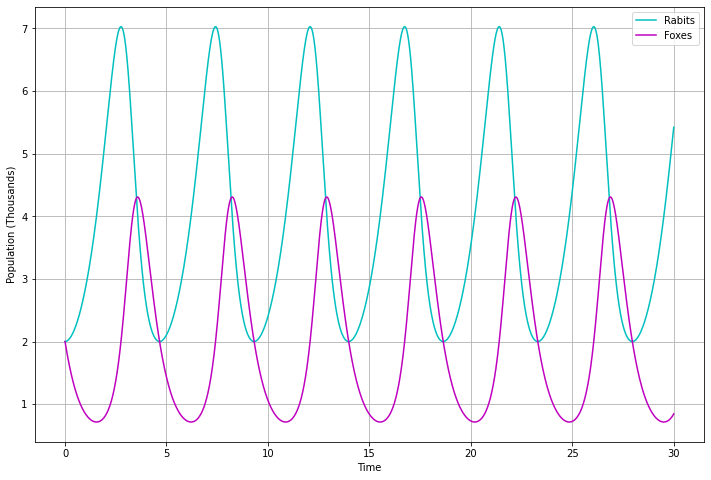

In [36]:
fig = plt.figure(figsize= (12,8))
plt.plot(t,x,'c',label = 'Rabits')
plt.plot(t,y,'m',label = 'Foxes')
plt.xlabel('Time')
plt.ylabel('Population (Thousands)')
plt.legend()
plt.grid()
plt.show

In [37]:
# Pendulum

In [38]:
def dw(O,w,t):
    return(-9.81*np.sin(O)/0.1)
def dO(O,w,t):
    return(w)

In [39]:
t,w,O = RK4_2(dw,0,dO,(np.pi*1/180),0,10,0.01)

<function matplotlib.pyplot.show(close=None, block=None)>

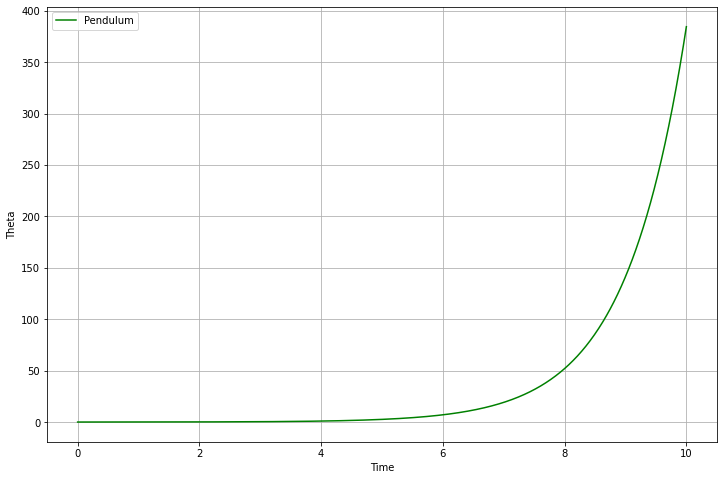

In [40]:
fig = plt.figure(figsize= (12,8))
plt.plot(t,O,'g',label = 'Pendulum')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.legend()
plt.grid()
plt.show

In [41]:
# Cv Integral

In [42]:
O_d = 428
p = 6.022e28
V = 1000e-6
k = 1.38e-23
N = 50

In [43]:
def guass_legendre(f,a,b,N):
    c1 = (b-a)/2
    c2 = (b+a)/2
    
    nodes,weights = np.polynomial.legendre.leggauss(N)
    
    
    I = c1*sum(weights*f(c1*nodes+c2))
    return(I)

func = lambda x: (x**4*np.exp(x))/((np.exp(x)-1)**2)

def Cv(f,T):
    xmax = 428/T
    I = guass_legendre(f,0,xmax,100)
    res = 9*V*p*k*I*(T/428)**3
    return(9*V*p*k*I*(T/428)**3)

In [44]:
val = Cv(func,500)
val

2404.1058322654444

In [45]:
Cv(func,200)

2003.9456858889416

In [46]:
T_values = np.linspace(5,500,100)
Cv_values = []
for T in T_values:
    thing = Cv(func,T)
    Cv_values.append(thing)

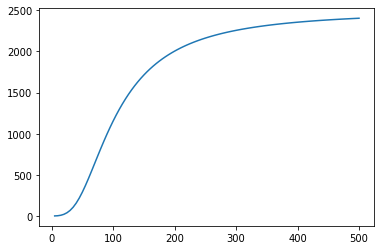

In [47]:
plt.plot(T_values,Cv_values)